In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from matplotlib.ticker import MaxNLocator

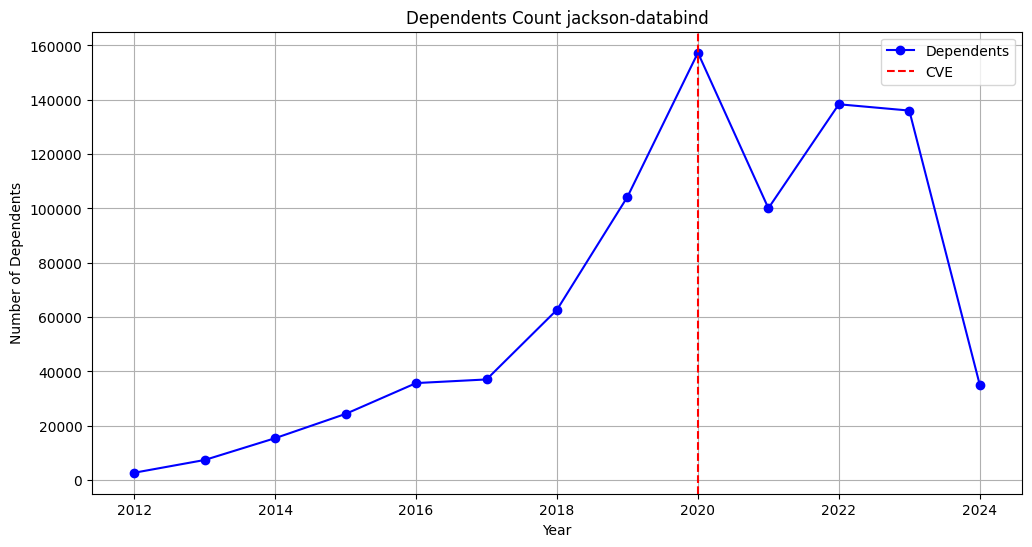

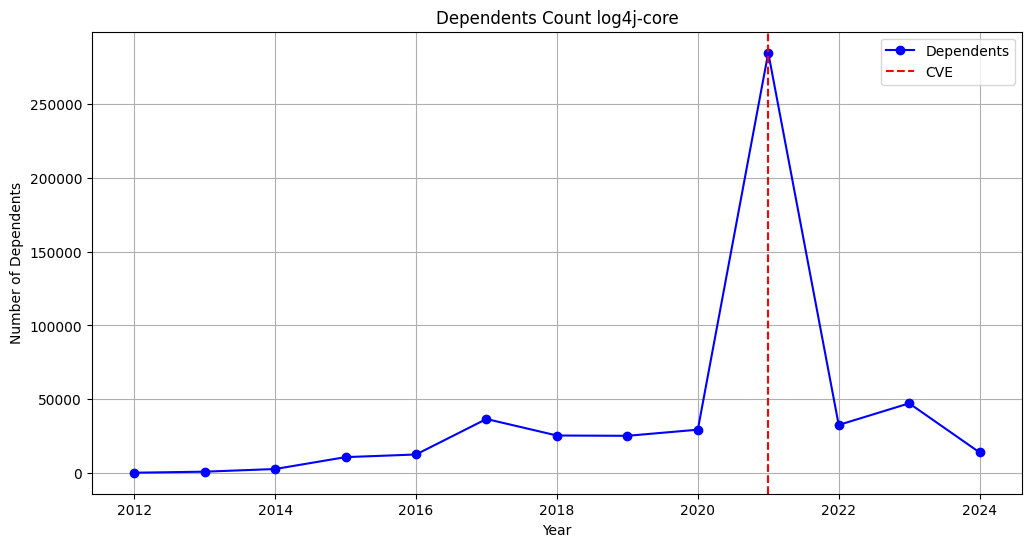

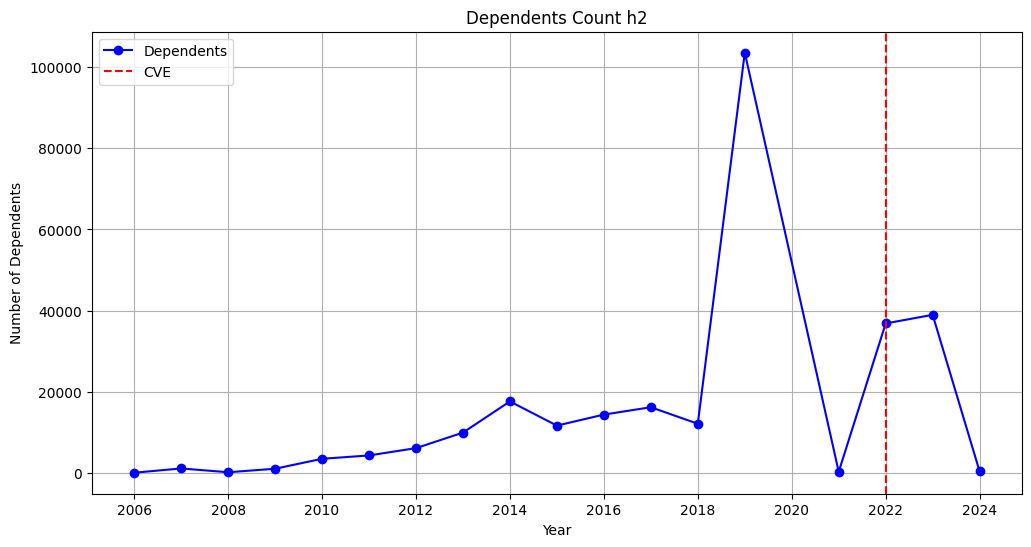

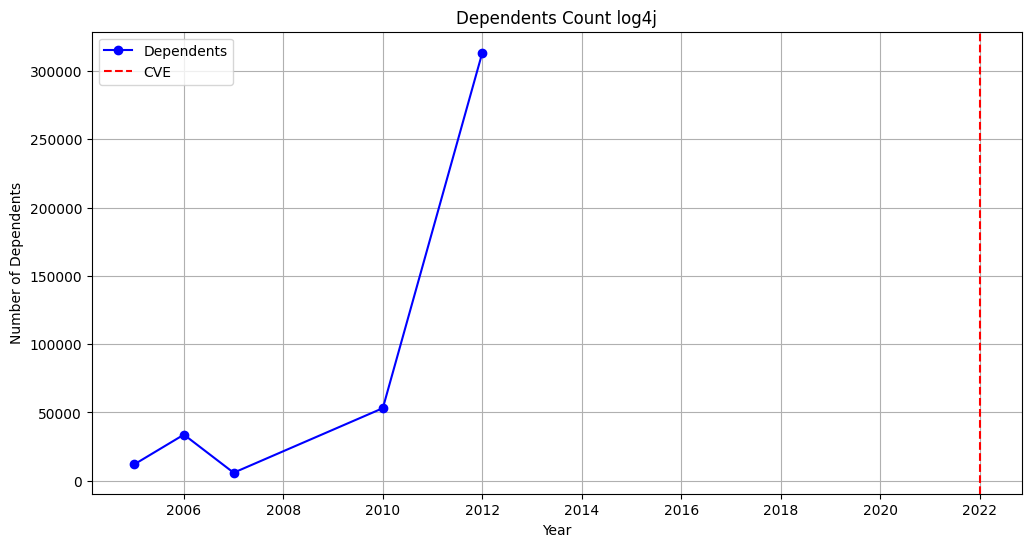

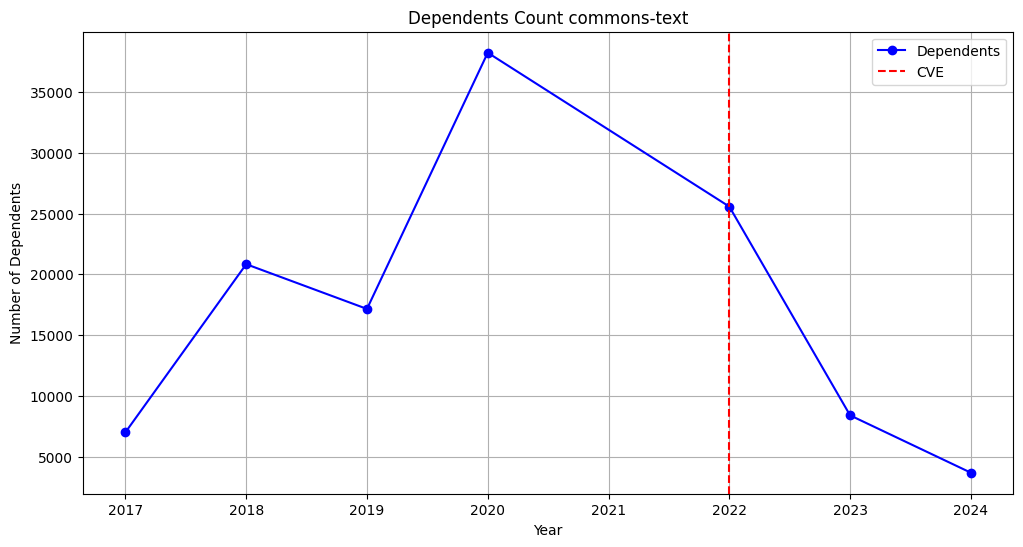

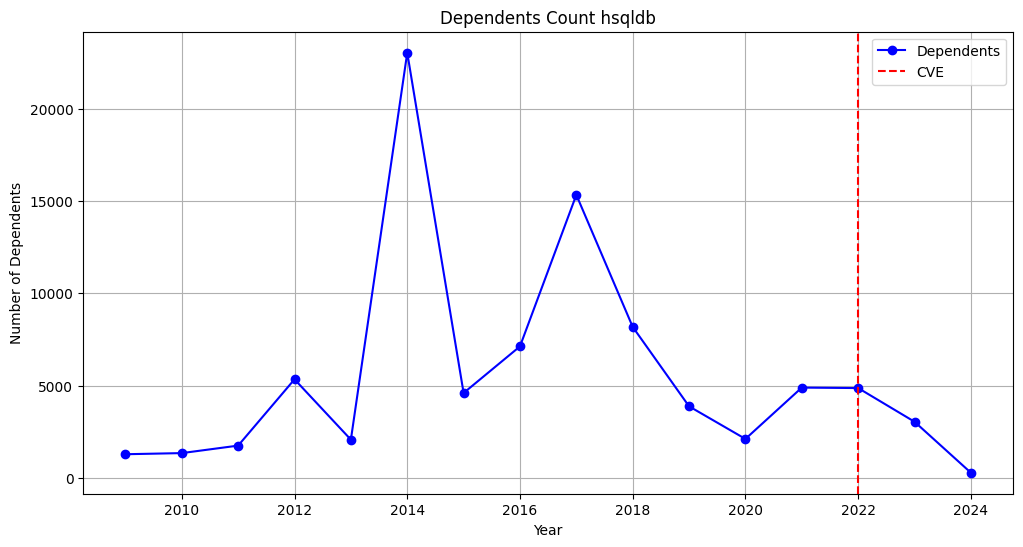

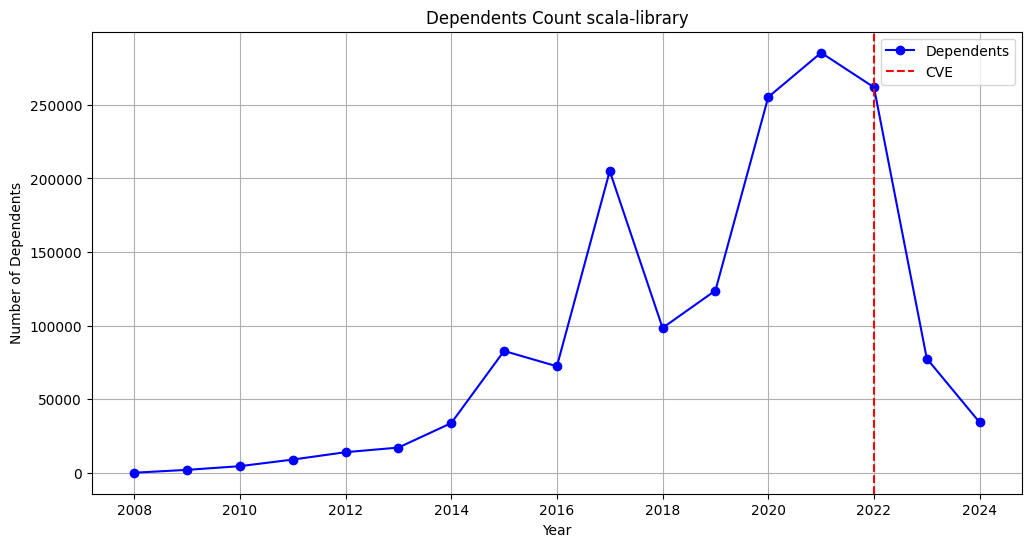

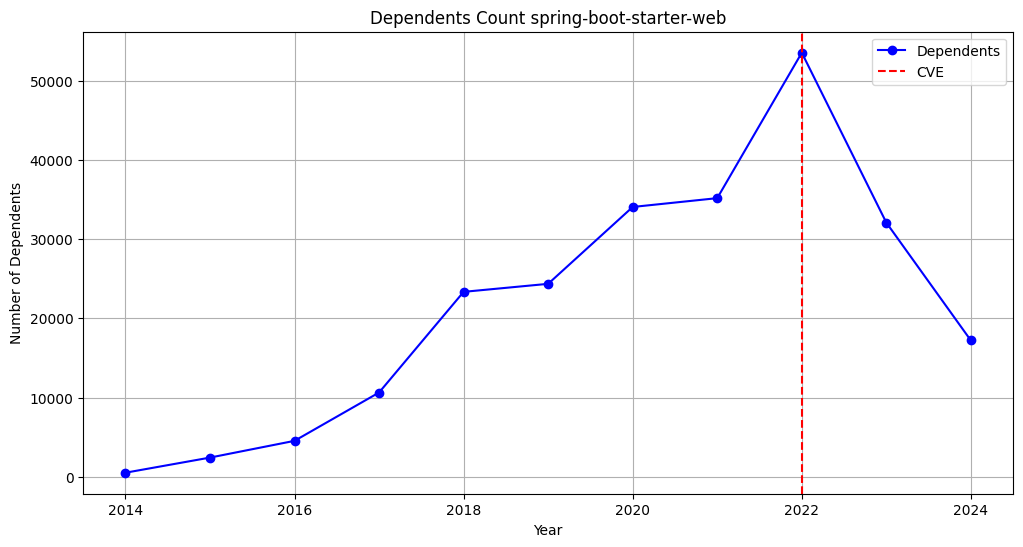

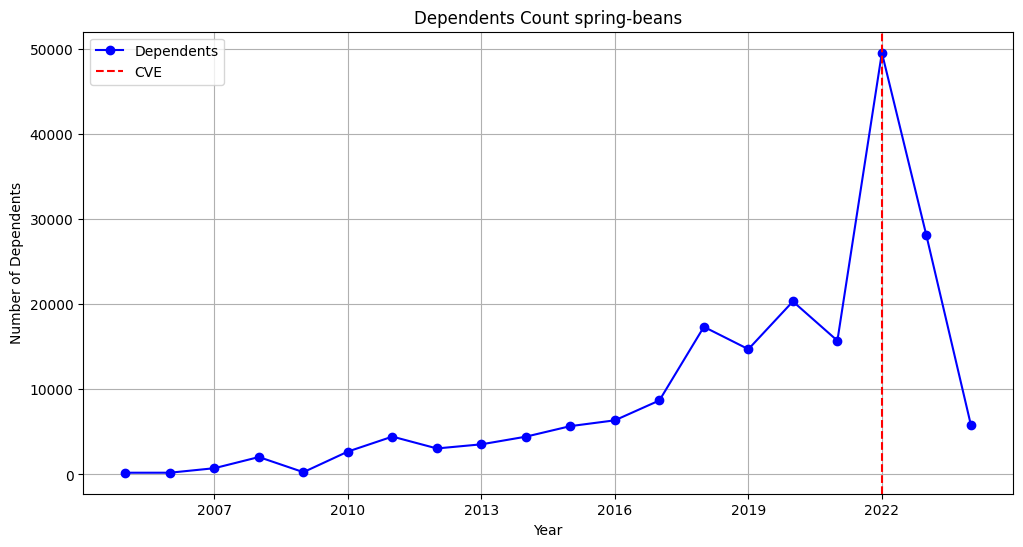

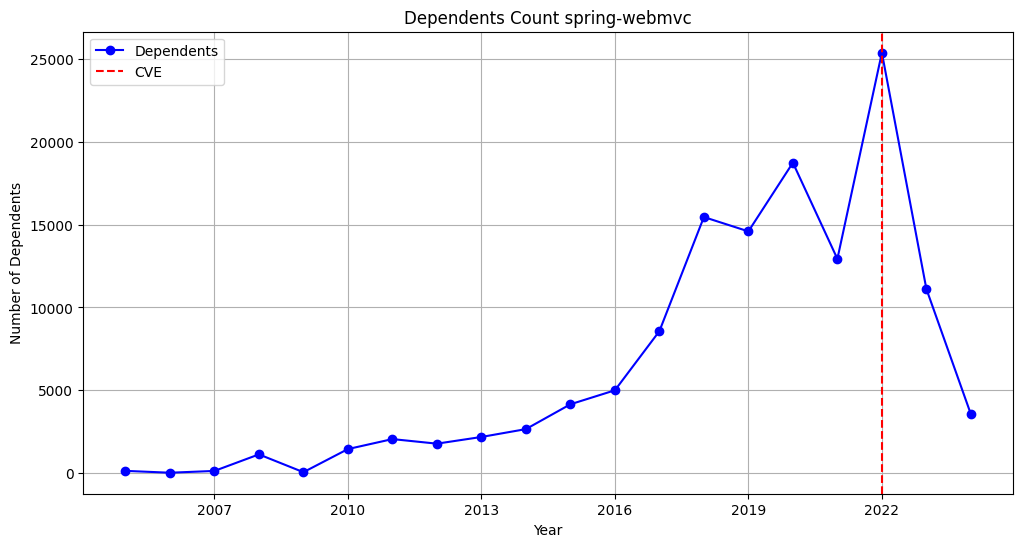

In [2]:
file_path = '../Data/Dependents'

for file in os.listdir(file_path):
    path = os.path.join(file_path, file)
    df = pd.read_csv(path)

    df['releaseDate'] = df['releaseDate'].str.strip('"')
    df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%Y-%m-%dT%H:%M:%SZ')
    df['year'] = df['releaseDate'].dt.year
    dependents_data = df[['year','dependentCount']]

    yearly_data = dependents_data.groupby('year')[['dependentCount']].sum().reset_index()

    artifact_name = file.split('_', 2)[-1].replace('.csv', '')

    plt.figure(figsize = (12,6))
    plt.plot(yearly_data['year'],yearly_data['dependentCount'], marker='o', label='Dependents', color='blue')
    
    cve_year = int(file[:4])
    
    # Add average dependency count line
    plt.axvline(x=cve_year, color='r', linestyle='--', label='CVE')
    
    plt.title(f'Dependents Count {artifact_name}')
    plt.xlabel('Year')
    plt.ylabel('Number of Dependents')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.legend()
    plt.grid(True)
    plt.show()

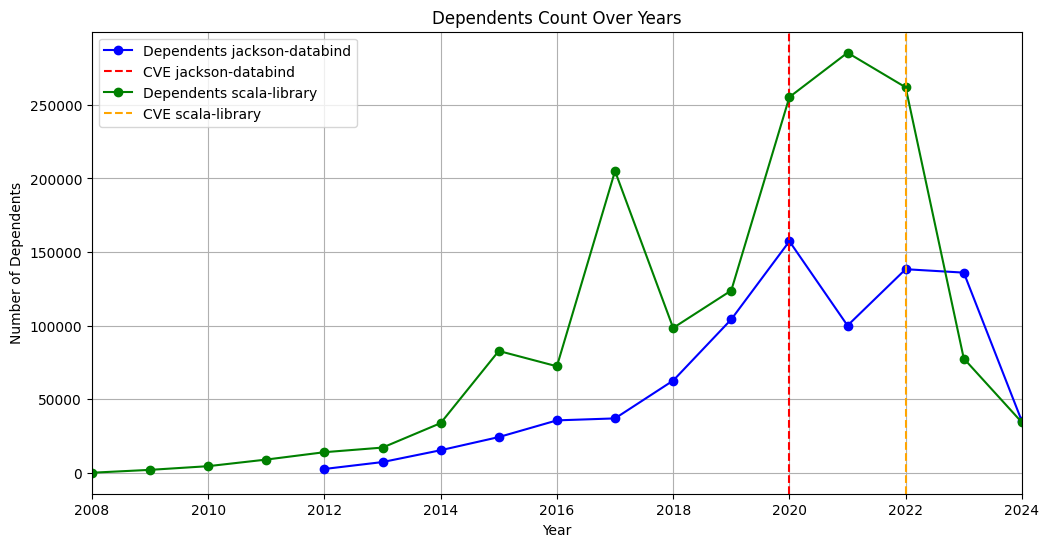

In [4]:
file_path1 = '../Data/Dependents/2020_com.fasterxml.jackson.core_jackson-databind.csv'
file_path2 = '../Data/Dependents/2022_org.scala-lang_scala-library.csv'

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Function to process the data
def process_data(df, file_path):
    # Extract the filename
    filename = os.path.basename(file_path)
    # Extract the year from the filename
    cve_year = int(filename[:4])
    # Process the data
    df['releaseDate'] = df['releaseDate'].str.strip('"')
    df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%Y-%m-%dT%H:%M:%SZ')
    df['year'] = df['releaseDate'].dt.year
    dependents_data = df[['year', 'dependentCount']]
    yearly_data = dependents_data.groupby('year')[['dependentCount']].sum().reset_index()
    artifact_name = filename.split('_', 2)[-1].replace('.csv', '')
    return yearly_data, artifact_name, cve_year


yearly_data1, artifact_name1, cve_year1 = process_data(df1, file_path1)
yearly_data2, artifact_name2, cve_year2 = process_data(df2, file_path2)

# Determine year range for the plot
min_year = min(yearly_data1['year'].min(), yearly_data2['year'].min())
max_year = max(yearly_data1['year'].max(), yearly_data2['year'].max())


plt.figure(figsize=(12, 6))


plt.plot(yearly_data1['year'], yearly_data1['dependentCount'], marker='o', label=f'Dependents {artifact_name1}', color='blue')
plt.axvline(x=cve_year1, color='r', linestyle='--', label=f'CVE {artifact_name1}')


plt.plot(yearly_data2['year'], yearly_data2['dependentCount'], marker='o', label=f'Dependents {artifact_name2}', color='green')
plt.axvline(x=cve_year2, color='orange', linestyle='--', label=f'CVE {artifact_name2}')


plt.title('Dependents Count Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Dependents')
plt.xlim(min_year, max_year)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.grid(True)


plt.show()